K-means con el dataset de Iris

In [1]:
# Importamos el dataset de Iris
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
X = iris.data
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
# Separamos los datos de sépalos y pétalos
X_sepal = X.iloc[:, :2]
X_petal = X.iloc[:, 2:]

X_sepal.head(), X_petal.head()

(   sepal length (cm)  sepal width (cm)
 0                5.1               3.5
 1                4.9               3.0
 2                4.7               3.2
 3                4.6               3.1
 4                5.0               3.6,
    petal length (cm)  petal width (cm)
 0                1.4               0.2
 1                1.4               0.2
 2                1.3               0.2
 3                1.5               0.2
 4                1.4               0.2)

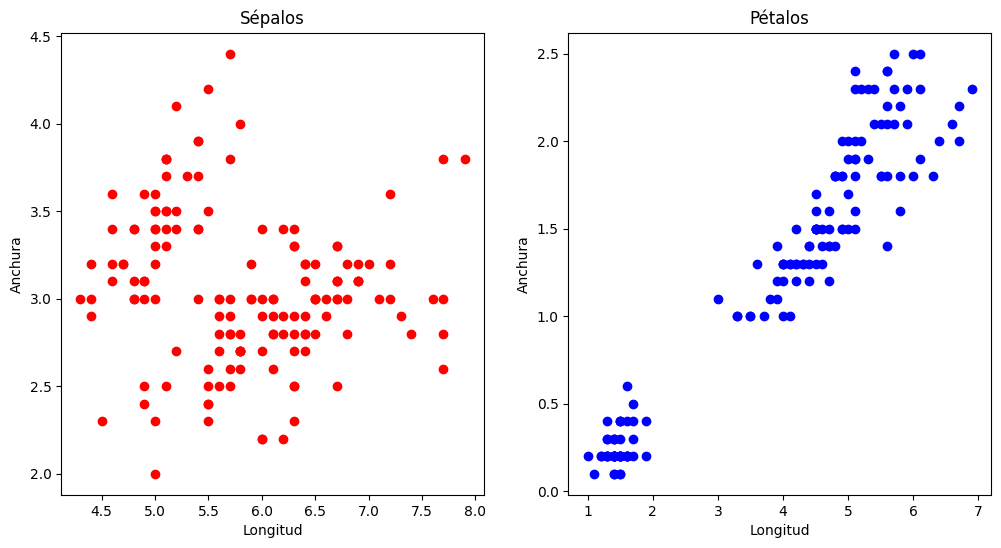

In [3]:
# Visualizamos los datos
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(X_sepal.iloc[:, 0], X_sepal.iloc[:, 1], c='red')
ax[0].set_title('Sépalos')
ax[0].set_xlabel('Longitud')
ax[0].set_ylabel('Anchura')

ax[1].scatter(X_petal.iloc[:, 0], X_petal.iloc[:, 1], c='blue')
ax[1].set_title('Pétalos')
ax[1].set_xlabel('Longitud')
ax[1].set_ylabel('Anchura')

plt.show()

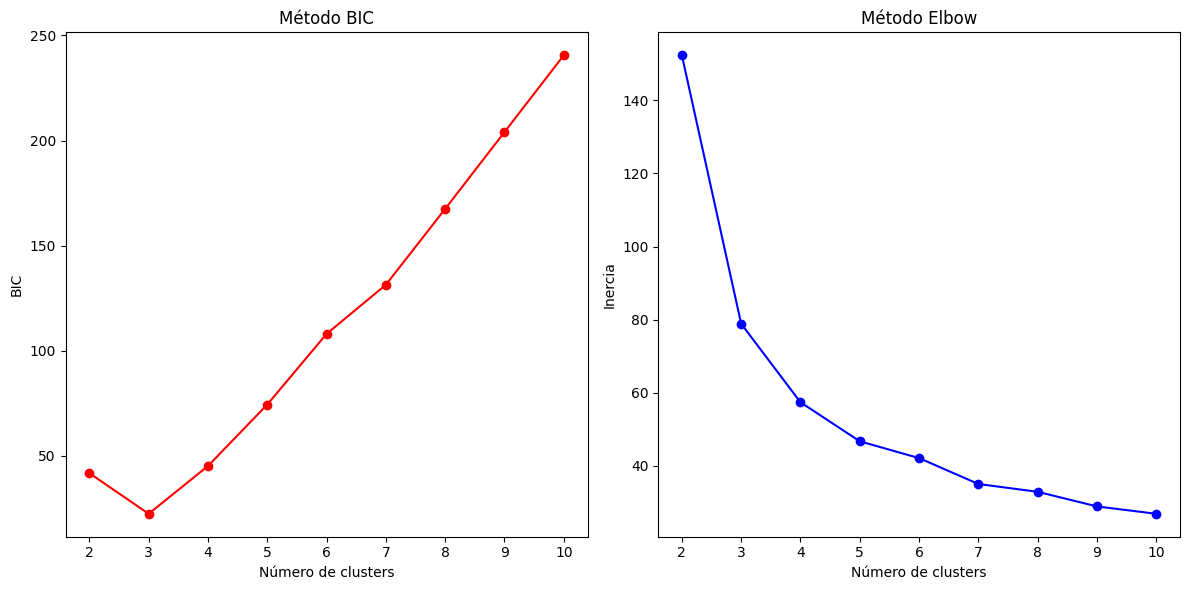

In [4]:
import numpy as np
from sklearn.cluster import KMeans

# Función para calcular el índice BIC
def BIC(K, grupos, X):
    N = X.shape[0]  # Número de datos
    P = X.shape[1]  # Número de variables
    xi = np.zeros((1, K))  # Vector xi

    # Calcula el sumatorio de xi en la fórmula
    for k in range(0, K):
        suma = 0
        for j in range(0, P):
            sigma = np.square(np.std(X.iloc[:, j]))
            sigma_j = np.square(np.std(X[grupos == k].iloc[:, j]))
            suma += 0.5 * np.log(sigma + sigma_j)

        n_k = sum(grupos == k)  # Número de elementos en el grupo k
        xi[0, k] = -n_k * suma

    bic = -2 * np.sum(xi) + 2 * K * P * np.log(N)
    return bic

# Paso 3: Ejecutar K-means con diferentes números de clusters y guardar las inercias y los valores de BIC
Kmax = 10
inercias = []
bics = []

for k in range(2, Kmax + 1):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X)
    grupos = kmeans.predict(X)
    inercias.append(kmeans.inertia_)
    bics.append(BIC(k, grupos, X))

# Paso 4: Graficar tanto el método Elbow como el método BIC para visualizar los resultados
plt.figure(figsize=(12, 6))

# Graficar BIC
plt.subplot(1, 2, 1)
plt.plot(range(2, Kmax + 1), bics, color='red', marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('BIC')
plt.title('Método BIC')

# Graficar Elbow
plt.subplot(1, 2, 2)
plt.plot(range(2, Kmax + 1), inercias, color='blue', marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método Elbow')

plt.tight_layout()
plt.show()

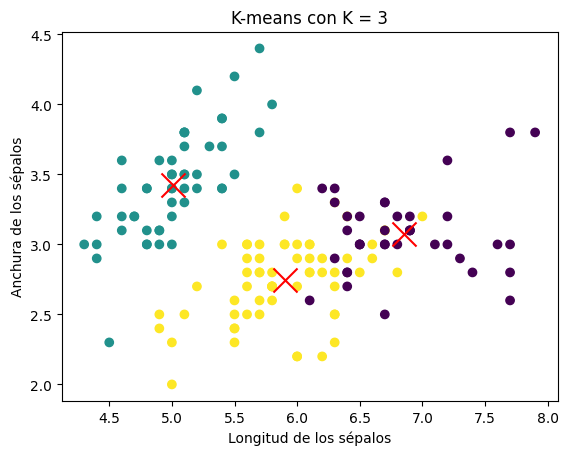

In [6]:
# Número óptimo de clusters
K = 3

# Entrenar el modelo
kmeans = KMeans(n_clusters=K, random_state=10, n_init=10)
kmeans.fit(X)

# Predecir los clusters
grupos = kmeans.predict(X)

# Mostrar los clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=grupos)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title("K-means con K = " + str(K))
plt.xlabel("Longitud de los sépalos")
plt.ylabel("Anchura de los sépalos")
plt.show()